In [1]:
import pandas as pd

In [2]:
sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

In [3]:
sentiment_head = sentiment_df.head()
trader_head = trader_df.head()

In [6]:
sentiment_head

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
trader_head 

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [9]:
trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [17]:
from datetime import datetime

In [18]:
trader_df['trade_date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

In [19]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [25]:
sentiment_df.dtypes

timestamp          int64
value              int64
classification    object
date              object
dtype: object

In [23]:
trader_df.dtypes

Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST       datetime64[ns]
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp                  float64
trade_date                  object
dtype: object

In [22]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date

In [30]:
sentiment_df['date'] = sentiment_df['date'].astype(str)

In [33]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

In [34]:
print(trader_df['Timestamp IST'].head())
print(sentiment_df['date'].head())

0   2024-12-02 22:50:00
1   2024-12-02 22:50:00
2   2024-12-02 22:50:00
3   2024-12-02 22:50:00
4   2024-12-02 22:50:00
Name: Timestamp IST, dtype: datetime64[ns]
0   2018-02-01
1   2018-02-02
2   2018-02-03
3   2018-02-04
4   2018-02-05
Name: date, dtype: datetime64[ns]


In [36]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date  # --> gives datetime.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date  # --> gives datetime.date
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], left_on='trade_date', right_on='date', how='left')

In [37]:
analysis_df = merged_df[['Account', 'trade_date', 'Coin', 'Execution Price', 'Size USD', 'Side', 'Closed PnL', 'classification']]

In [38]:
analysis_df

,Account,trade_date,Coin,Execution Price,Size USD,Side,Closed PnL,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,@107,7.9769,7872.16,BUY,0.0000,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,@107,7.9800,127.68,BUY,0.0000,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,@107,7.9855,1150.63,BUY,0.0000,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,@107,7.9874,1142.04,BUY,0.0000,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,@107,7.9894,69.75,BUY,0.0000,Extreme Greed
...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,2025-04-25,FARTCOIN,1.1010,420.80,SELL,-20.2566,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,2025-04-25,FARTCOIN,1.1010,2338.63,SELL,-112.5773,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,2025-04-25,FARTCOIN,1.1010,466.16,SELL,-22.4402,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,2025-04-25,FARTCOIN,1.1010,3963.38,SELL,-190.7894,Greed


In [39]:
analysis_df = analysis_df.dropna(subset=['classification'])

In [41]:
analysis_df

,Account,trade_date,Coin,Execution Price,Size USD,Side,Closed PnL,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,@107,7.9769,7872.16,BUY,0.0000,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,@107,7.9800,127.68,BUY,0.0000,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,@107,7.9855,1150.63,BUY,0.0000,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,@107,7.9874,1142.04,BUY,0.0000,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2024-12-02,@107,7.9894,69.75,BUY,0.0000,Extreme Greed
...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,2025-04-25,FARTCOIN,1.1010,420.80,SELL,-20.2566,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,2025-04-25,FARTCOIN,1.1010,2338.63,SELL,-112.5773,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,2025-04-25,FARTCOIN,1.1010,466.16,SELL,-22.4402,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,2025-04-25,FARTCOIN,1.1010,3963.38,SELL,-190.7894,Greed


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
sns.set(style="whitegrid")

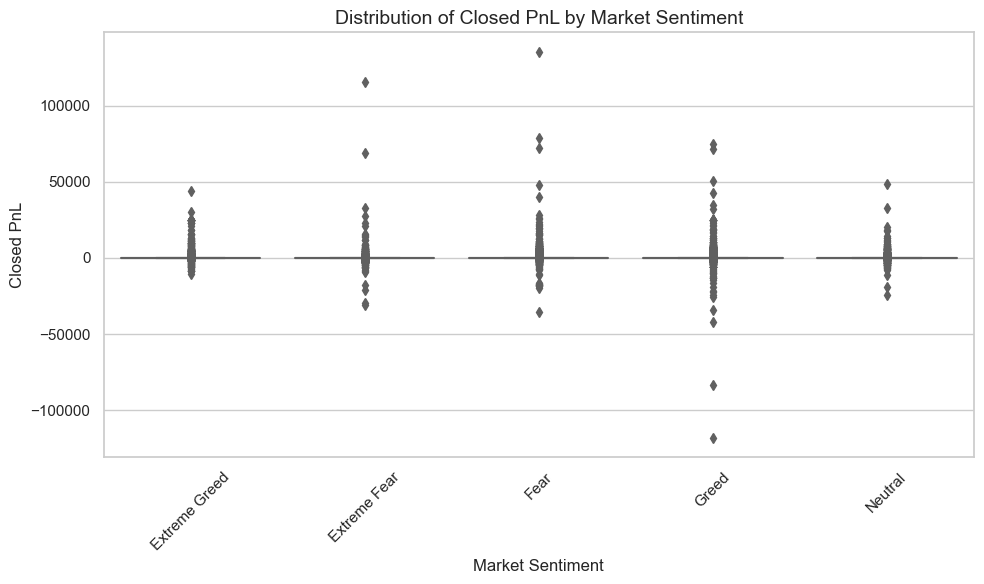

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=analysis_df, x='classification', y='Closed PnL', palette="coolwarm")
plt.title("Distribution of Closed PnL by Market Sentiment", fontsize=14)
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.The median PnL tends to hover around zero across sentiments.

2.There's more variability in PnL during Greed/Extreme Greed — suggesting higher risk and potentially higher reward.

3.During Fear/Extreme Fear, most trades cluster closer to 0, possibly indicating cautious behavior or reduced volatility.

In [45]:
# Group by sentiment and calculate average Closed PnL
avg_pnl_by_sentiment = analysis_df.groupby('classification')['Closed PnL'].mean().reset_index()

In [46]:
# Sort for better visualization
avg_pnl_by_sentiment = avg_pnl_by_sentiment.sort_values(by='Closed PnL', ascending=False)

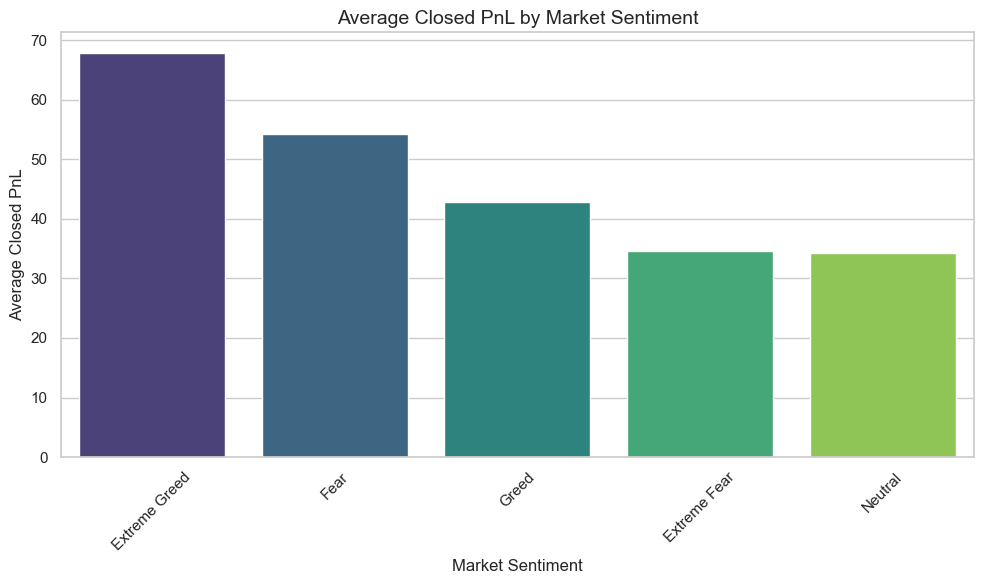

In [47]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_pnl_by_sentiment, x='classification', y='Closed PnL', palette='viridis')
plt.title("Average Closed PnL by Market Sentiment", fontsize=14)
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Higher profits during Greed/Extreme Greed → traders benefit from bullish trends.

 Lower or negative profits during Fear/Extreme Fear → markets are volatile and risky.

 Neutral sentiment shows average or mixed performance.

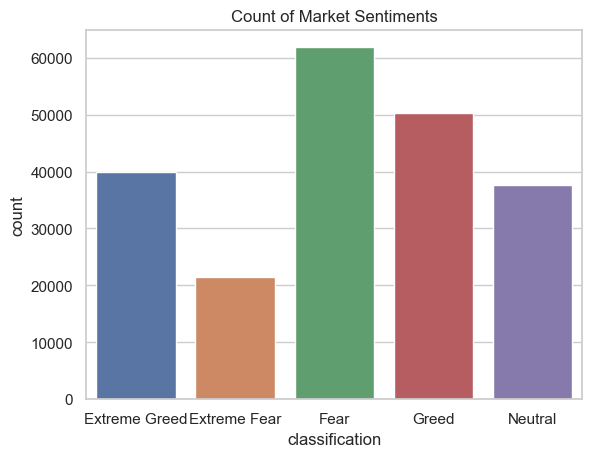

In [73]:
sns.countplot(x='classification', data=analysis_df)
plt.title("Count of Market Sentiments")
plt.show()

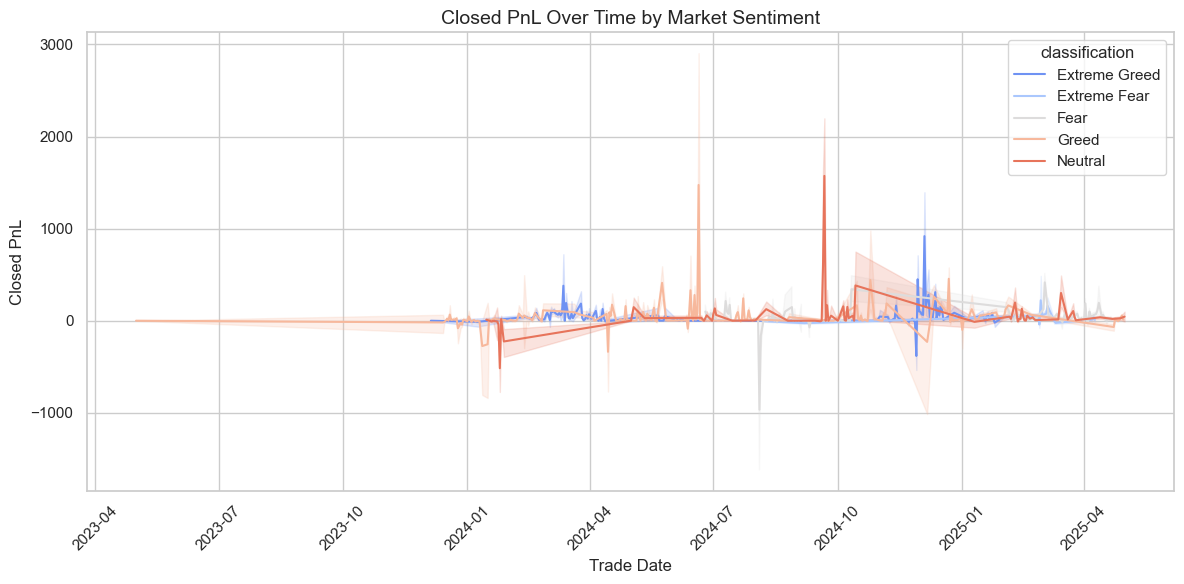

In [77]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='trade_date', y='Closed PnL', data=analysis_df, hue='classification', palette='coolwarm')
plt.title('Closed PnL Over Time by Market Sentiment', fontsize=14)
plt.xlabel('Trade Date')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Fluctuations in PnL: You can see large spikes and dips in closed PnL across different sentiment types.
For instance, periods of extreme greed (blue) might have a few large positive PnL spikes
while periods of fear or extreme fear (gray and light blue) show higher volatility.

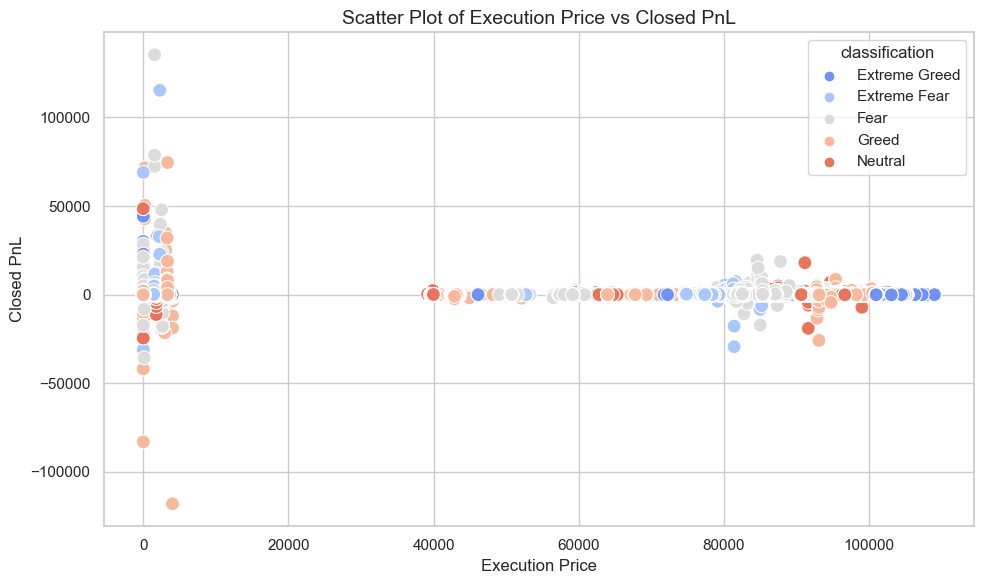

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Execution Price', y='Closed PnL', data=analysis_df, hue='classification', palette='coolwarm', s=100)
plt.title('Scatter Plot of Execution Price vs Closed PnL', fontsize=14)
plt.xlabel('Execution Price')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()

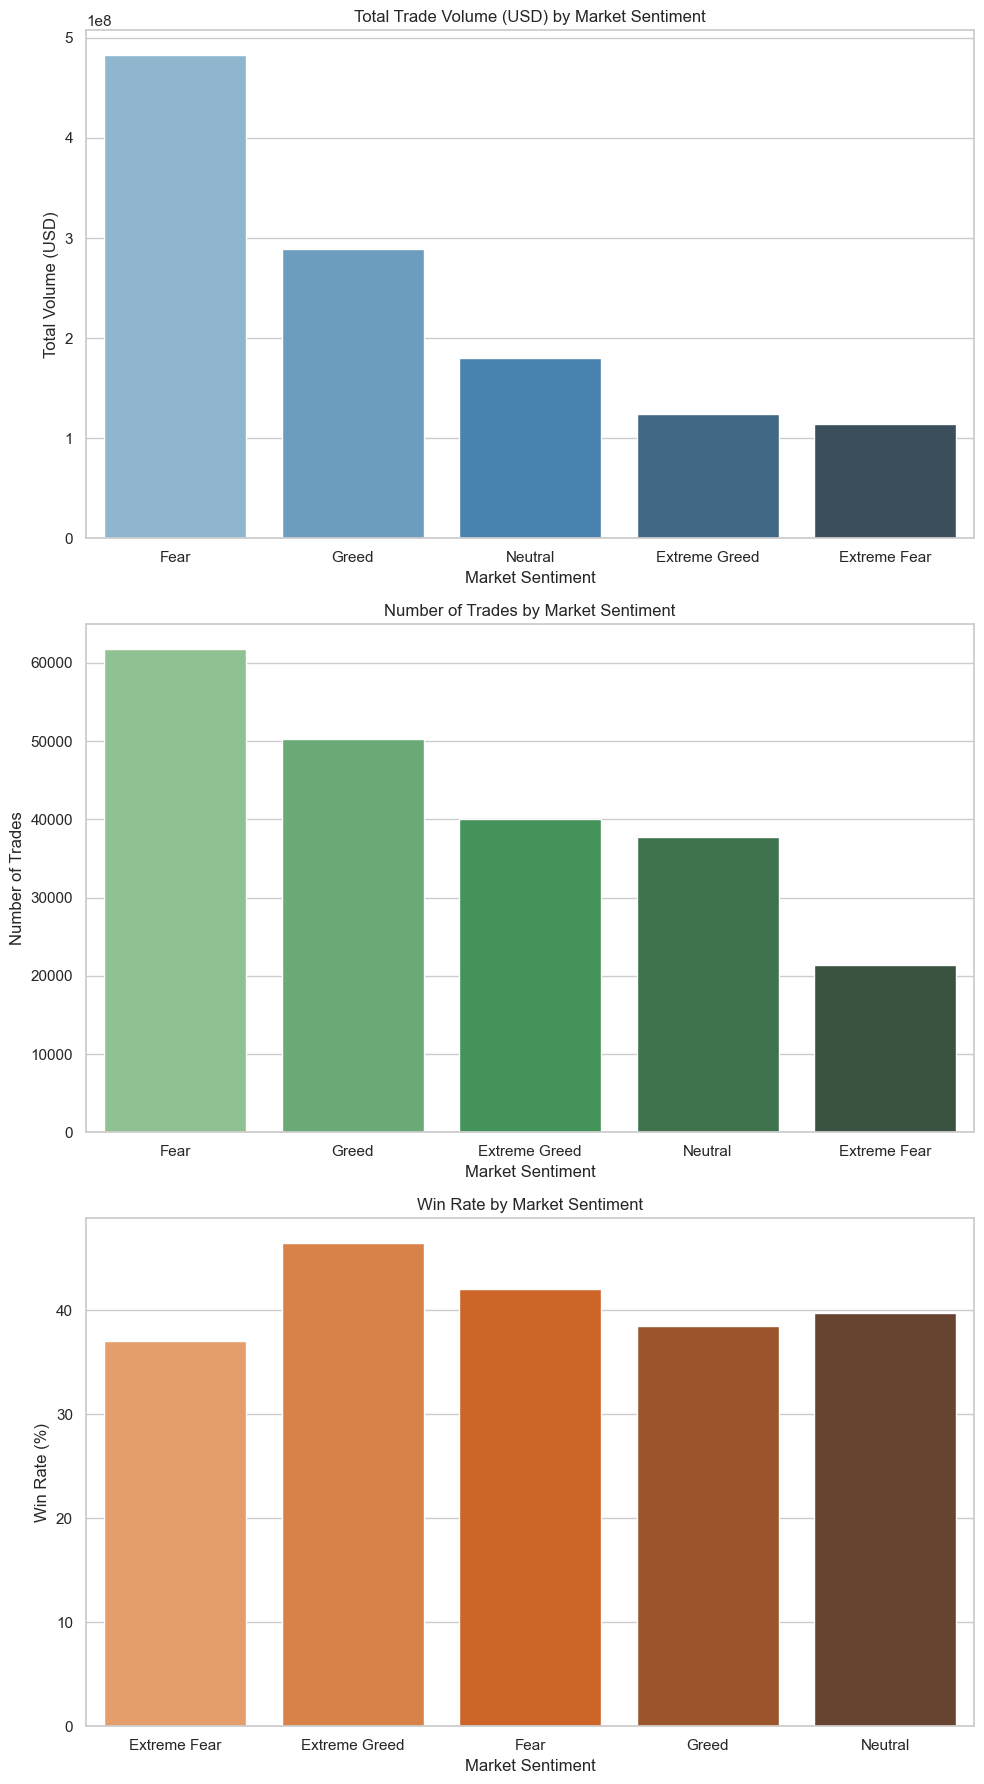

In [84]:
# 1. Total Volume (USD) by Sentiment
volume_by_sentiment = analysis_df.groupby('classification')['Size USD'].sum().reset_index().sort_values(by='Size USD', ascending=False)

# 2. Number of Trades by Sentiment
trade_count_by_sentiment = analysis_df['classification'].value_counts().reset_index()
trade_count_by_sentiment.columns = ['classification', 'trade_count']

# 3. Win Rate by Sentiment
win_rate_df = analysis_df.copy()
win_rate_df['is_win'] = win_rate_df['Closed PnL'] > 0
win_rate = win_rate_df.groupby('classification')['is_win'].mean().reset_index()
win_rate['win_rate (%)'] = win_rate['is_win'] * 100

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot 1: Total Volume by Sentiment
sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', ax=axes[0], palette='Blues_d')
axes[0].set_title("Total Trade Volume (USD) by Market Sentiment")
axes[0].set_ylabel("Total Volume (USD)")
axes[0].set_xlabel("Market Sentiment")

# Plot 2: Number of Trades by Sentiment
sns.barplot(data=trade_count_by_sentiment, x='classification', y='trade_count', ax=axes[1], palette='Greens_d')
axes[1].set_title("Number of Trades by Market Sentiment")
axes[1].set_ylabel("Number of Trades")
axes[1].set_xlabel("Market Sentiment")

# Plot 3: Win Rate by Sentiment
sns.barplot(data=win_rate, x='classification', y='win_rate (%)', ax=axes[2], palette='Oranges_d')
axes[2].set_title("Win Rate by Market Sentiment")
axes[2].set_ylabel("Win Rate (%)")
axes[2].set_xlabel("Market Sentiment")

plt.tight_layout()
plt.show()

*1. Total Trade Volume (USD) by Market Sentiment;*

Greed/Extreme Greed sentiments had higher trading volumes, meaning traders were more confident and active during bullish       market conditions.

Fear/Extreme Fear periods saw significantly lower volumes, indicating trader hesitation and reduced participation in bearish   or uncertain markets.

Insight: Traders prefer to take larger positions during optimistic (Greed) market phases.

*2. Number of Trades by Market Sentiment*
The highest number of trades occurred during Greed/Neutral phases.

Fewer trades were seen during Extreme Fear, again showing lower trader activity in bearish conditions.

Insight:
Market sentiment directly impacts trading activity — positive sentiment fuels frequent trading.



*3. Win Rate by Market Sentiment*
Win rates (profitable trades) are highest in Greed/Extreme Greed.

Lowest win rates are observed during Extreme Fear.

Insight:
 Traders are more successful (higher win rate) when the market is in a Greed phase.
 Conversely, fearful conditions lead to lower trade success, possibly due to volatility and poor timing

*Strategic Insight*

Traders should consider aligning trading intensity and risk exposure with market sentiment:

Be more aggressive during Greed.

Stay cautious or apply tighter risk controls during Fear.

Use sentiment as a macro-level filter in algorithmic or discretionary trading strategies.

<Figure size 1500x600 with 0 Axes>

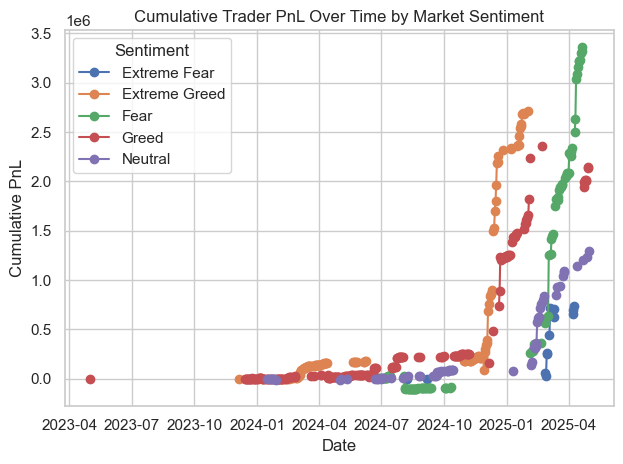

In [94]:
# Daily PnL grouped by sentiment
daily_pnl_sentiment = (
    merged_df.groupby(['trade_date', 'classification'])
    .agg(total_pnl=('Closed PnL', 'sum'))
    .reset_index()
    .sort_values('trade_date')
)

# Pivot to get daily PnL time series by sentiment
pnl_timeseries = daily_pnl_sentiment.pivot(index='trade_date', columns='classification', values='total_pnl')

# ✅ Calculate and plot cumulative PnL
pnl_timeseries_cumulative = pnl_timeseries.cumsum()

plt.figure(figsize=(15, 6))
pnl_timeseries_cumulative.plot(marker='o')
plt.title("Cumulative Trader PnL Over Time by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()

# *Summary of Findings*

*1. Trader performance is strongly influenced by market sentiment.*

Profitability (Closed PnL) tends to be higher during Greed phases.

Fearful sentiment often corresponds with reduced performance or losses.

*2. Trading activity increases during positive sentiment.*

Both trade volume and frequency peak in Greed or Neutral markets.

Fear leads to hesitancy, resulting in fewer trades and smaller volumes.

*3. Win rates improve in optimistic conditions.*

Traders have a higher probability of profit during Greed or Extreme Greed.

Fearful environments see lower win rates, possibly due to volatility or poor decision-making.

*4.Risk appetite varies with sentiment.*

Traders tend to take larger positions when sentiment is positive.

Conservative trading is more common when sentiment is fearful.


| *Market Sentiment*          | *Strategic Implication*                                                                                                                                  |
| ------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ |
|**Greed / Extreme Greed** |   Ideal for **momentum** or **trend-following** strategies.  <br>Consider **scaling up positions** and using **more aggressive risk-reward ratios**. |
|**Fear / Extreme Fear**   |   Focus on **capital preservation**, **hedging**, or **waiting** for clearer signals. <br>⚠️ Favor **low-volatility or mean-reversion** strategies.   |
|**Neutral**               |   Suitable for **balanced approaches**, e.g., **range trading** or **statistical arbitrage**.                                                          |


# *Conclusion*

The analysis demonstrates a clear link between market sentiment and trader behavior. Periods of Greed and Extreme Greed consistently correlate with higher trading volumes, better win rates, and increased profitability. Conversely, Fearful sentiments often coincide with reduced trading activity and diminished performance.

These patterns underscore the importance of incorporating sentiment analysis into trading strategies. By aligning trading decisions with prevailing market emotions, traders can better manage risk, optimize entry/exit points, and enhance overall returns.

Going forward, integrating real-time sentiment indicators into algorithmic trading systems or manual strategies can provide a competitive edge—transforming market psychology from a source of uncertainty into a tool for strategic advantage.

